# Challenge Set 4

## Table of Contents

<a href='#q1'>Q1</a>  
<a href='#q2'>Q2</a>  
<a href='#q3'>Q3</a>  
<a href='#q4'>Q4</a>  

#### Imports

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn import cross_validation as cv
from sklearn import metrics
import statsmodels.formula.api as smf

%matplotlib inline

<a id='q1'></a>
## Challenge 1

Generate (fake) data that is linearly related to log(x).
You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)
Simulate some data from this model.
Then fit two models to it:
quadratic (second degree polynomial) and
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
x, y = [], []
for i in range(1, 100):
    x.append(i)
    y.append(1.2+4*math.log10(i))
df = pd.DataFrame({'x': x, 'y': y})

In [3]:
model_quad = smf.ols(formula='df.y ~ np.power(df.x, 2)', data = df).fit()
model_log = smf.ols(formula='df.y ~ np.log10(df.x)', data = df).fit()

In [4]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   df.y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 26 Jul 2016   Prob (F-statistic):           2.33e-21
Time:                        14:59:32   Log-Likelihood:                -141.04
No. Observations:                  99   AIC:                             286.1
Df Residuals:                      97   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             6.0979      0.154     39.685      0.000         5.793     6.403
np.power(df.x, 2)     0.0004   3.46e-05     12.227      0.000         0.000     0.000
==============================================================================
Omnibus:                       62.707   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.254
Skew:                          -2.207   Prob(JB):                     9.14e-54
Kurtosis:                       9.303   Cond. No.                     6.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   df.y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.985e+31
Date:                Tue, 26 Jul 2016   Prob (F-statistic):               0.00
Time:                        14:59:33   Log-Likelihood:                 3153.6
No. Observations:                  99   AIC:                            -6303.
Df Residuals:                      97   BIC:                            -6298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          1.2000   1.46e-15   8.22e+14      0.000         1.200     1.200
np.log10(df.x)     4.0000   8.98e-16   4.46e+15      0.000         4.000     4.000
==============================================================================
Omnibus:                       19.131   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.302
Skew:                           0.675   Prob(JB):                     3.95e-10
Kurtosis:                       5.945   Cond. No.                         8.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='q2'></a>
## Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)
Split the data into a training and test set.
Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.
(You could use sklearn.metrics.mean_squared_error.)

In [6]:
x, y = [], []
for i in range(1, 100):
    x.append(i)
    y.append(1.2+4*4*i + 2*(i**2))
df = pd.DataFrame({'x': x, 'y': y})

In [7]:
x_train, x_test, y_train, y_test = cv.train_test_split(df.x, df.y, test_size = 0.3, random_state=1)

In [8]:
x_train = x_train.reshape(69, 1)
y_train = y_train.reshape(69, 1)

In [9]:
model = LinearRegression().fit(x_train, y_train)

In [10]:
metrics.mean_squared_error(y_train,model.predict(x_train))

2069694.6112253515

<a id='q3'></a>
## Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error,
test error,
R squared,
AIC


In [122]:
train, test = cv.train_test_split(df, test_size=0.3, random_state=1)

In [101]:
results_0 = smf.ols(formula = 'y ~ 1+ np.power(x,0)', data=train).fit()
results_1 = smf.ols(formula = 'y ~ 1+ np.power(x,1)', data=train).fit()
results_2 = smf.ols(formula = 'y ~ 1+ np.power(x,2)', data=train).fit()
results_3 = smf.ols(formula = 'y ~ 1+ np.power(x,3)', data=train).fit()
results_4 = smf.ols(formula = 'y ~ 1+ np.power(x,4)', data=train).fit()
results_5 = smf.ols(formula = 'y ~ 1+ np.power(x,5)', data=train).fit()
results_6 = smf.ols(formula = 'y ~ 1+ np.power(x,6)', data=train).fit()
results_7 = smf.ols(formula = 'y ~ 1+ np.power(x,7)', data=train).fit()

In [110]:
pred_0 = results_0.predict(test[['x']])
pred_1 = results_1.predict(test[['x']])
pred_2 = results_2.predict(test[['x']])
pred_3 = results_3.predict(test[['x']])
pred_4 = results_4.predict(test[['x']])
pred_5 = results_5.predict(test[['x']])
pred_6 = results_6.predict(test[['x']])
pred_7 = results_7.predict(test[['x']])

trn_0 = results_0.predict(train[['x']])
trn_1 = results_1.predict(train[['x']])
trn_2 = results_2.predict(train[['x']])
trn_3 = results_3.predict(train[['x']])
trn_4 = results_4.predict(train[['x']])
trn_5 = results_5.predict(train[['x']])
trn_6 = results_6.predict(train[['x']])
trn_7 = results_7.predict(train[['x']])

In [179]:
tr_err_0 = ((trn_0**2)-(train.x**2)).mean()
tr_err_1 = ((trn_1**2)-(train.x**2)).mean()
tr_err_2 = ((trn_2**2)-(train.x**2)).mean()
tr_err_3 = ((trn_3**2)-(train.x**2)).mean()
tr_err_4 = ((trn_4**2)-(train.x**2)).mean()
tr_err_5 = ((trn_5**2)-(train.x**2)).mean()
tr_err_6 = ((trn_6**2)-(train.x**2)).mean()
tr_err_7 = ((trn_7**2)-(train.x**2)).mean()

te_err_0 = ((pred_0**2)-(test.x**2)).mean()
te_err_1 = ((pred_1**2)-(test.x**2)).mean()
te_err_2 = ((pred_2**2)-(test.x**2)).mean()
te_err_3 = ((pred_3**2)-(test.x**2)).mean()
te_err_4 = ((pred_4**2)-(test.x**2)).mean()
te_err_5 = ((pred_5**2)-(test.x**2)).mean()
te_err_6 = ((pred_6**2)-(test.x**2)).mean()
te_err_7 = ((pred_7**2)-(test.x**2)).mean()

In [180]:
aic = [results_0.aic, results_1.aic, results_2.aic, results_3.aic, results_4.aic, results_5.aic, results_6.aic, 
       results_7.aic]

r_sq = [results_0.rsquared, results_1.rsquared, results_2.rsquared, results_3.rsquared, results_4.rsquared, 
        results_5.rsquared, results_6.rsquared, results_7.rsquared]

te_err = [te_err_0, te_err_1, te_err_2, te_err_3, te_err_4, te_err_5, te_err_6, te_err_7]

tr_err = [tr_err_0, tr_err_1, tr_err_2, tr_err_3, tr_err_4, tr_err_5, tr_err_6, tr_err_7]

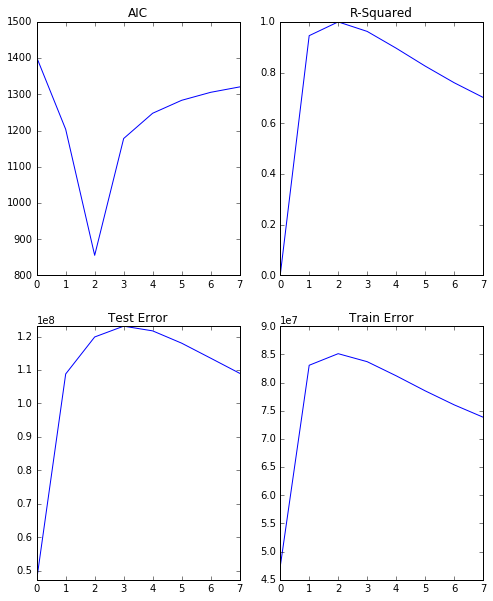

In [181]:
fig = plt.figure(figsize=(8, 10))
x = range(0, 8)

ax = fig.add_subplot(221)
ax.plot(x, aic, label='aic')
ax.set_title("AIC")

ax = fig.add_subplot(222)
ax.plot(x, r_sq, label = 'r sq')
ax.set_title("R-Squared")

ax = fig.add_subplot(223)
ax.plot(x, te_err, label = 'test err')
ax.set_ybound(upper = max(te_err)+1, lower = min(te_err)-1)
ax.set_title("Test Error")

ax = fig.add_subplot(224)
ax.plot(x, tr_err, label='train err')
ax.set_title("Train Error")


plt.show()

<a id='q4'></a>
## Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [233]:
d = {}
for i in range(1, 100):
    d[i] = 1.2+4*math.log10(i)
    
x = np.array(d.keys()).reshape(len(d.keys()), 1)
y = np.array(d.values()).reshape(len(d.values()), 1)

In [254]:
tr_err = []
te_err = []
for i in range(5, 100, 5):
    #print x[:i]
    #print y[:i]
    x_train, x_test, y_train, y_test = cv.train_test_split(x[:i], y[:i], test_size = 0.3, random_state=1)
    model = LinearRegression().fit(x_train, y_train)
    tr_err.append(metrics.mean_squared_error(y_train,model.predict(x_train)))
    te_err.append(metrics.mean_squared_error(y_test, model.predict(x_test)))

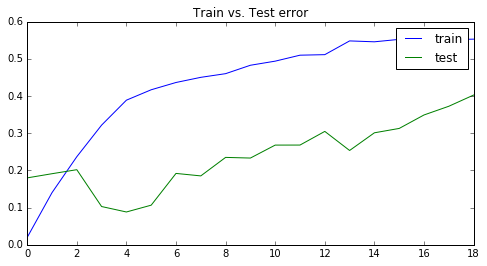

In [256]:
plt.figure(figsize=(8,4))
plt.plot(tr_err, label = 'train')
plt.plot(te_err, label = 'test')
plt.legend()
plt.title('Train vs. Test error')
plt.show()